In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)

In [6]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# print(df.head())
# print(df.info())
# print(df.describe(include="all"))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


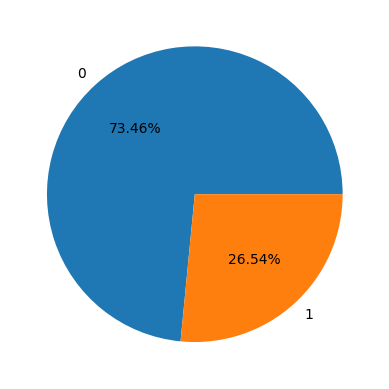

In [15]:
gb = df.groupby("Churn").agg({"customerID":"count"})
plt.pie(gb["customerID"], labels = gb.index, autopct = "%1.2f%%")
plt.show()

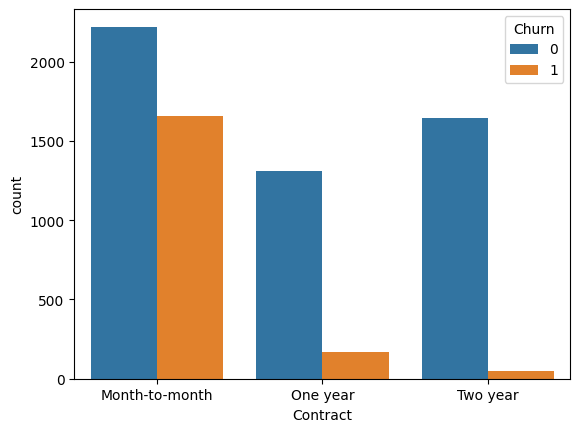

In [20]:
sns.countplot(x  = df["Contract"], data = df, hue = df["Churn"])
plt.show()

In [21]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

In [22]:
yn_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for c in yn_cols:
    if c in df.columns:
        df[c] = df[c].map({"Yes": 1, "No": 0})

In [23]:
if "Contract" in df.columns:
    contract_map = {"Month-to-month": 0, "One year": 1, "Two year": 2}
    df["Contract"] = df["Contract"].map(contract_map).fillna(0)

if "InternetService" in df.columns:
    internet_map = {"No": 0, "DSL": 1, "Fiber optic": 2}
    df["InternetService"] = df["InternetService"].map(internet_map).fillna(0)

In [24]:
features = [
    "SeniorCitizen", "Partner", "Dependents", "PhoneService",
    "PaperlessBilling", "tenure", "MonthlyCharges", "TotalCharges",
    "Contract", "InternetService"
]
X = df[features].copy()
y = df["Churn"]


In [25]:
#only perform when null values are included
# mask = X.notna().all(axis=1)
# X = X[mask]
# y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [28]:
print("Accuracy :", accuracy_score(y_test, y_pred)) #how many prediction were correct from the total
print("Precision:", precision_score(y_test, y_pred)) #all the positive predictions that models has made, from how many were actually positive
print("Recall   :", recall_score(y_test, y_pred)) #from the actual positives how many were model was able to identify
print("F1-score :", f1_score(y_test, y_pred)) #mean b/w recall and precision. 
print("ROC-AUC  :", roc_auc_score(y_test, y_proba)) # 0 - 1, if towasrds 1, the model is good. if 0.5 (random guessing)

Accuracy : 0.7963094393186657
Precision: 0.639871382636656
Recall   : 0.5320855614973262
F1-score : 0.581021897810219
ROC-AUC  : 0.8385569247461829


In [29]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[923 112]
 [175 199]]


In [32]:
example = [[
    1,      # SeniorCitizen (0/1)
    1,      # Partner (Yes=1)
    0,      # Dependents (Yes=1)
    1,      # PhoneService (Yes=1)
    1,      # PaperlessBilling (Yes=1)
    2,     # tenure (months)
    85.0,   # MonthlyCharges
    1020.0, # TotalCharges
    0,      # Contract (0=Month-to-month, 1=One year, 2=Two year)
    1       # InternetService (0=No, 1=DSL, 2=Fiber optic)
]]
pred_prob = model.predict_proba(example)[0, 1]
pred_class = model.predict(example)[0]

print("Predicted churn probability:", pred_prob)
print("Predicted class (1=churn, 0=no churn):", pred_class)

Predicted churn probability: 0.6355394967005871
Predicted class (1=churn, 0=no churn): 1


C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\wscub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
